## Movie Recommendation System using Python

### Content based movie recommendation system
#### Dataset - TMDB 5000 Movie Dataset

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import dataset

In [2]:
credits_df = pd.read_csv('E:/Recommendation engine/tmdb_5000_credits.csv')
movies_df = pd.read_csv('E:/Recommendation engine/tmdb_5000_movies.csv')

In [3]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# check the shape of movies dataset
movies_df.shape

(4803, 20)

In [5]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
# check the shape of credits dataset
credits_df.shape

(4803, 4)

In [7]:
V = movies_df['vote_count']
R = movies_df['vote_average']
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.70)

movies_df['weighted_average'] = (V/(V+m) * R) + (m/(m+V) * C)

Text(0, 0.5, 'Movie Title')

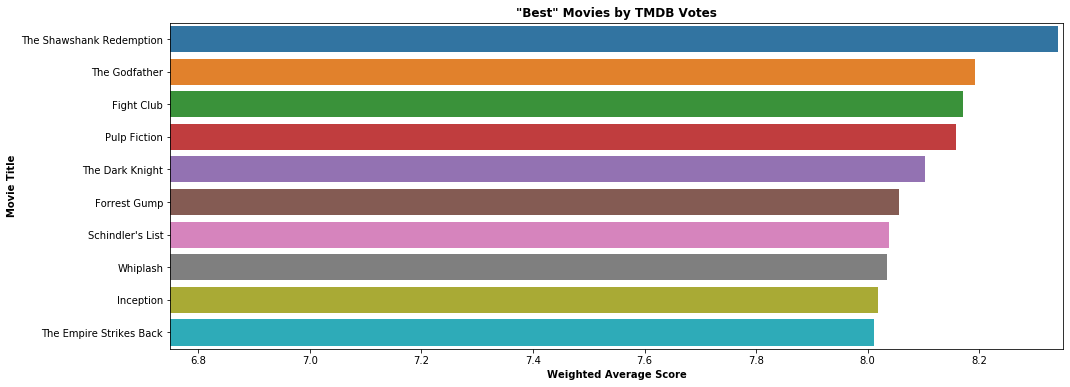

In [8]:
# visualization 
wavg = movies_df.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=wavg['weighted_average'].head(10), y=wavg['original_title'].head(10), data=wavg)

plt.xlim(6.75, 8.35)
plt.title('"Best" Movies by TMDB Votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

Text(0, 0.5, 'Movie Title')

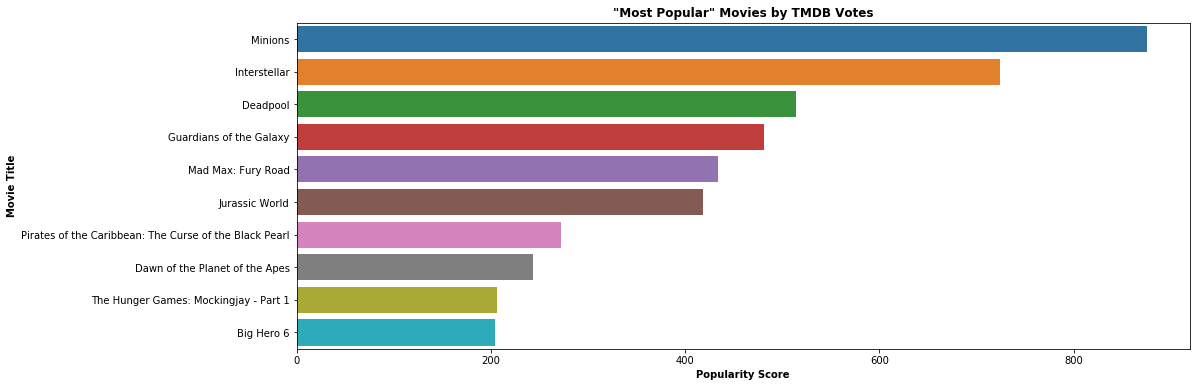

In [9]:
popular = movies_df.sort_values('popularity', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=popular['popularity'].head(10), y=popular['original_title'].head(10), data=popular)

plt.title('"Most Popular" Movies by TMDB Votes', weight='bold')
plt.xlabel('Popularity Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [10]:
#Adding 'cast' column to first data frame
movies_df['cast'] = credits_df['cast']
movies_df['crew'] = credits_df['crew']

In [11]:
#checking added columns in data frame
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'weighted_average', 'cast', 'crew'],
      dtype='object')

For cotent based recommendation engine we need to get metadata about a movie , which we can get from 'keywords' , 'cast' ,'crew' and 'genres' columns.

In [12]:
features=['keywords','cast','crew','genres']

In [13]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

In [14]:
#Fetching director's name from the crew feature , if not listed then return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [15]:
#Return list top 3 elements or entire list , which ever is more
def get_list(x):
    if isinstance(x,list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names=names[:3]
        return names
    #Return empty list in case of missing/malformed data
    return []

In [16]:
#Apply get_director function to 'crew' feature
movies_df['director'] = movies_df['crew'].apply(get_director)

#defining list of feature again to apply get_list function
features = ['cast', 'keywords', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [17]:
movies_df[['title','director','keywords','cast','genres']].head()

,title,director,keywords,cast,genres
0,Avatar,James Cameron,"[culture clash, future, space war]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,Gore Verbinski,"[ocean, drug abuse, exotic island]","[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]"
2,Spectre,Sam Mendes,"[spy, based on novel, secret agent]","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]"
4,John Carter,Andrew Stanton,"[based on novel, mars, medallion]","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]"


In [18]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [19]:
#Apply clean_data function to our features
features = ['cast', 'keywords', 'genres','director']

for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [20]:
movies_df[['title','director','keywords','cast','genres']].head()

,title,director,keywords,cast,genres
0,Avatar,jamescameron,"[cultureclash, future, spacewar]","[samworthington, zoesaldana, sigourneyweaver]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,goreverbinski,"[ocean, drugabuse, exoticisland]","[johnnydepp, orlandobloom, keiraknightley]","[adventure, fantasy, action]"
2,Spectre,sammendes,"[spy, basedonnovel, secretagent]","[danielcraig, christophwaltz, léaseydoux]","[action, adventure, crime]"
3,The Dark Knight Rises,christophernolan,"[dccomics, crimefighter, terrorist]","[christianbale, michaelcaine, garyoldman]","[action, crime, drama]"
4,John Carter,andrewstanton,"[basedonnovel, mars, medallion]","[taylorkitsch, lynncollins, samanthamorton]","[action, adventure, sciencefiction]"


Create combine features function now, which will be a string that contains all metadata(Keywords,Cast,Director and Genres) about movie that we want to feed our vectorizer

In [21]:
# Function to combine features 
def combine_features(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

movies_df['combine_feature'] = movies_df.apply(combine_features,axis=1)

In [22]:
movies_df[['title','combine_feature']].head()

,title,combine_feature
0,Avatar,cultureclash future spacewar samworthington zo...
1,Pirates of the Caribbean: At World's End,ocean drugabuse exoticisland johnnydepp orland...
2,Spectre,spy basedonnovel secretagent danielcraig chris...
3,The Dark Knight Rises,dccomics crimefighter terrorist christianbale ...
4,John Carter,basedonnovel mars medallion taylorkitsch lynnc...


#### Building the Recommendation Engine

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
#creating new CountVectorizer() object
cv = CountVectorizer(stop_words='english') 

#feeding combined strings(movie contents) to CountVectorizer() object
count_matrix = cv.fit_transform(movies_df["combine_feature"])

# cosine similarity
cosine_sim = cosine_similarity(count_matrix,count_matrix)

In [25]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,weighted_average,cast,crew,director,combine_feature
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,7.148013,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,6.807627,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,6.276075,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...
3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,7.509565,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,dccomics crimefighter terrorist christianbale ...
4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,6.098319,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...


In [26]:
# Reset index of our main DataFrame
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

In [27]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['title'].iloc[movie_indices]

let's call recommendation engine fucntion to get similar movies

In [28]:
print("Recommendations for The Dark Knight Rises")
get_recommendations('The Dark Knight Rises', cosine_sim)

Recommendations for The Dark Knight Rises


65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [29]:
print("Recommendations for Avatar")
get_recommendations('Avatar', cosine_sim)

Recommendations for Avatar


206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
Name: title, dtype: object

In [30]:
print("Recommendations for The Godfather")
get_recommendations('The Godfather', cosine_sim)

Recommendations for The Godfather


867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

We can see that our recommender has been successful recommendending similar movies 

## Thank You !!